<a href="https://colab.research.google.com/github/priyanshgupta1998/Machine_learning/blob/master/Dataset_Analyssis_regression/data_regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


1) From Github (Files < 25MB)
The easiest way to upload a CSV file is from your GitHub repository. Click on the dataset in your repository, then click on View Raw. Copy the link to the raw dataset and store it as a string variable called url in Colab as shown below (a cleaner method but it’s not necessary). The last step is to load the url into Pandas read_csv to get the dataframe.

>> url = 'copied_raw_GH_link'    
>> df1 = pd.read_csv(url)

Now Dataset is now stored in a Pandas Dataframe

In [31]:
data = pd.read_csv('https://raw.githubusercontent.com/priyanshgupta1998/Machine_learning/master/Dataset_Analyssis_regression/network_backup_dataset.csv')
print(data.shape)
data.head()

(18588, 7)


,Week #,Day of Week,Backup Start Time - Hour of Day,Work-Flow-ID,File Name,Size of Backup (GB),Backup Time (hour)
0,1,Monday,1,work_flow_0,File_0,0.0,0
1,1,Monday,1,work_flow_2,File_12,0.0,0
2,1,Monday,1,work_flow_2,File_13,0.0,0
3,1,Monday,1,work_flow_2,File_14,0.0,0
4,1,Monday,1,work_flow_2,File_16,0.0,0


In [32]:
data.columns

Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name', 'Size of Backup (GB)',
       'Backup Time (hour)'],
      dtype='object')

In [36]:
data['Day of Week'].value_counts()

Sunday       2700
Wednesday    2700
Saturday     2700
Thursday     2700
Friday       2658
Monday       2610
Tuesday      2520
Name: Day of Week, dtype: int64

In [37]:
data['Work-Flow-ID'].value_counts()

work_flow_3    3780
work_flow_4    3780
work_flow_2    3741
work_flow_0    3687
work_flow_1    3600
Name: Work-Flow-ID, dtype: int64

In [41]:
data['File Name'].nunique()

30

In [42]:
data.columns = ['week', 'day_of_week_orig', 'start_time','work_flow_orig','file_name_orig','size','duration']
data.head()

,week,day_of_week_orig,start_time,work_flow_orig,file_name_orig,size,duration
0,1,Monday,1,work_flow_0,File_0,0.0,0
1,1,Monday,1,work_flow_2,File_12,0.0,0
2,1,Monday,1,work_flow_2,File_13,0.0,0
3,1,Monday,1,work_flow_2,File_14,0.0,0
4,1,Monday,1,work_flow_2,File_16,0.0,0


In [43]:
data.columns

Index(['week', 'day_of_week_orig', 'start_time', 'work_flow_orig',
       'file_name_orig', 'size', 'duration'],
      dtype='object')

In [60]:
data['week'].value_counts()

12    1241
6     1241
1     1241
13    1240
7     1240
14    1239
9     1239
8     1239
5     1239
4     1239
3     1239
11    1238
10    1238
2     1238
15    1237
Name: week, dtype: int64

In [59]:
data['size'].value_counts().index

Float64Index([                  0.0,   0.11929570452399982,
                0.12037461625261606, 0.0018882652008296765,
               0.009245655284775329,    0.1148021721695144,
               0.004426063493641849,   0.07959836639424851,
                 0.1168023830586849,   0.05933600017583929,
              ...
                 0.1148225433072666,   0.07971532953823741,
               0.024767275408432696,   0.16245946036519882,
                 0.0648065642841332,   0.14053603823477973,
                0.07809093375517522, 0.0012557778719764006,
                0.03991789266373082,   0.19865544564549956],
             dtype='float64', length=11593)

In [55]:
data['duration'].value_counts()

1    7525
0    6996
2    2789
3     966
4     312
Name: duration, dtype: int64

In [0]:
# load data from file
def replace_str_with_int(data, column, insert_pos, truncate_pos=0, map_day=None):
    new_col = []
    for item in data[column]:
        if map_day:
            new_col.append(map_day[item])
        else:
            new_col.append(int(item[truncate_pos:]))
    
    data.insert(insert_pos, column[:len(column) - 5], new_col)
    data.drop(column, 1, inplace = True)    

In [0]:
# 1 encode day of week
map_day = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
replace_str_with_int(data, 'day_of_week_orig', 2, 0, map_day)

In [0]:
# 2 encode work flow
replace_str_with_int(data, 'work_flow_orig', 3, 10)

# 3 encode file name
replace_str_with_int(data, 'file_name_orig', 4, 5)


In [46]:
print(data.shape)
data.head()

(18588, 7)


,week,day_of_week,start_time,work_flow,file_name,size,duration
0,1,1,1,0,0,0.0,0
1,1,1,1,2,12,0.0,0
2,1,1,1,2,13,0.0,0
3,1,1,1,2,14,0.0,0
4,1,1,1,2,16,0.0,0


In [0]:
# save the plot data
def get_sizes(days, data):
    week = int(days / 7) + 1
    remain = days % 7
    df = data[(data['week'] < week) | ((data['week'] == week) & (data['day_of_week'] <= remain))]
    df = df.groupby(['work_flow', 'week', 'day_of_week']).agg({'size': np.sum})

    all_sizes = {}
    for i in range(5):
        all_sizes[i] = df.loc[i]['size'].values
    return all_sizes

sizes20 = get_sizes(20, data)
sizes105 = get_sizes(105, data)


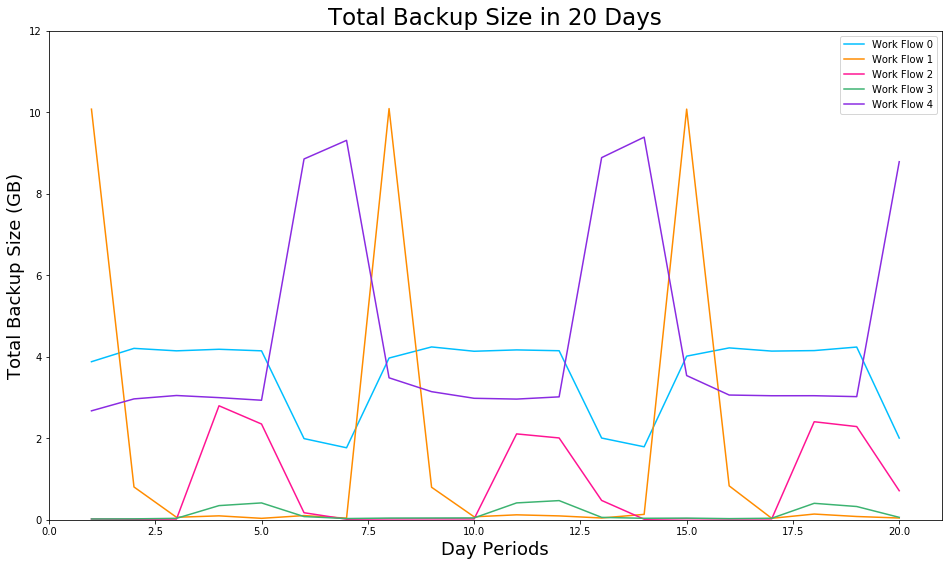

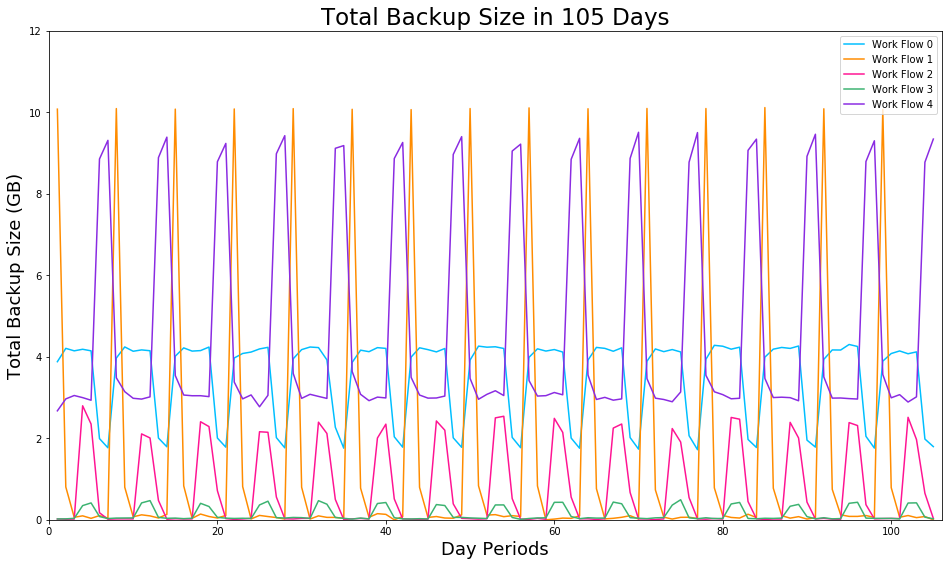

In [17]:
# plot figures
def plot_size_vs_days(period, total_size):
    plt.figure(figsize = (16,9))
    colors = ['deepskyblue', 'darkorange', 'deeppink', 'mediumseagreen', 'blueviolet']
    for i in range(5):
        plt.plot(range(1, period+1), total_size[i], colors[i], label='Work Flow '+str(i))
    plt.ylabel('Total Backup Size (GB)', fontsize = 18)
    plt.xlabel('Day Periods', fontsize = 18)
    plt.title('Total Backup Size in '+str(period)+' Days', fontsize = 23)
    plt.axis([0,period+1,0,12])
    plt.legend(loc = 'upper right')
    plt.show()

# 20 periods
plot_size_vs_days(20, sizes20)
# 105 periods
plot_size_vs_days(105, sizes105)

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression


In [0]:
# train and fit linear regression model
input_arr = []
for row in range(len(data)):
    input_arr.append(data.loc[row, 'week':'file_name'].values)

output_arr = data.loc[:, 'size'].values

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

lr = linear_model.LinearRegression()
kf = KFold(n_splits=10, shuffle=False)
best_param = None
best_rmse = float("inf") 
fold = [i for i in range(10)]
train_rmses = []
test_rmses = []



In [0]:
for train_index, test_index in kf.split(input_arr):
    train_in = [input_arr[i] for i in train_index]
    train_out = [output_arr[i] for i in train_index]
    test_in = [input_arr[i] for i in test_index]
    test_out = [output_arr[i] for i in test_index]
    
    lr.fit(train_in, train_out)
    
    test_pre = lr.predict(test_in)
    train_pre = lr.predict(train_in)
    
    train_rmse = rmse(train_pre, train_out)
    test_rmse = rmse(test_pre, test_out)
    
    if ((train_rmse + test_rmse) < best_rmse):
        best_param = lr.get_params()

    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)

df = pd.DataFrame({
    'fold' : fold,
    'train_rmse' : train_rmses,
    'test_rmse' : test_rmses
}, columns = ['fold', 'train_rmse', 'test_rmse'])




,fold,train_rmse,test_rmse
0,0,0.103243,0.106718
1,1,0.103967,0.100185
2,2,0.103226,0.106850
3,3,0.103946,0.100367
4,4,0.103195,0.107116
5,5,0.103938,0.100445
6,6,0.103203,0.107050
7,7,0.103936,0.100467
8,8,0.103201,0.107074
9,9,0.103992,0.099947


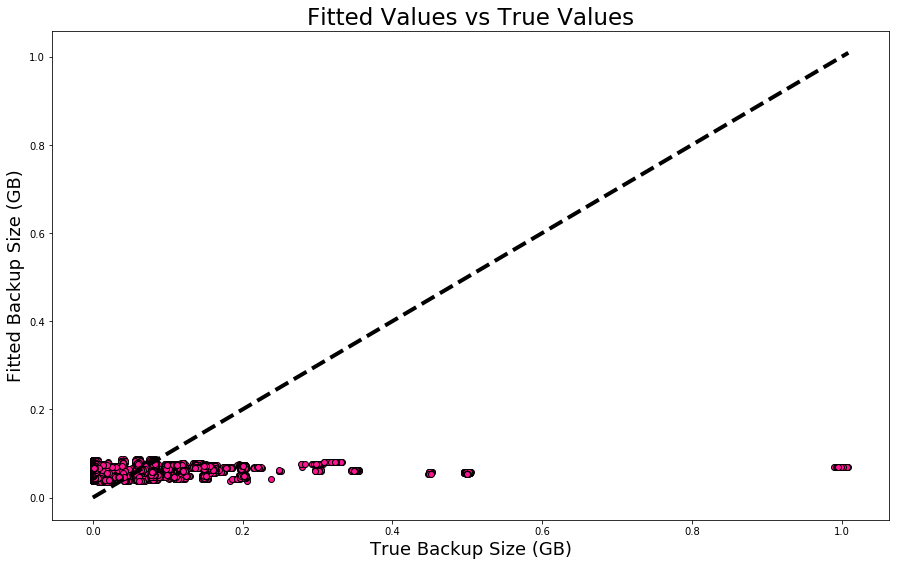

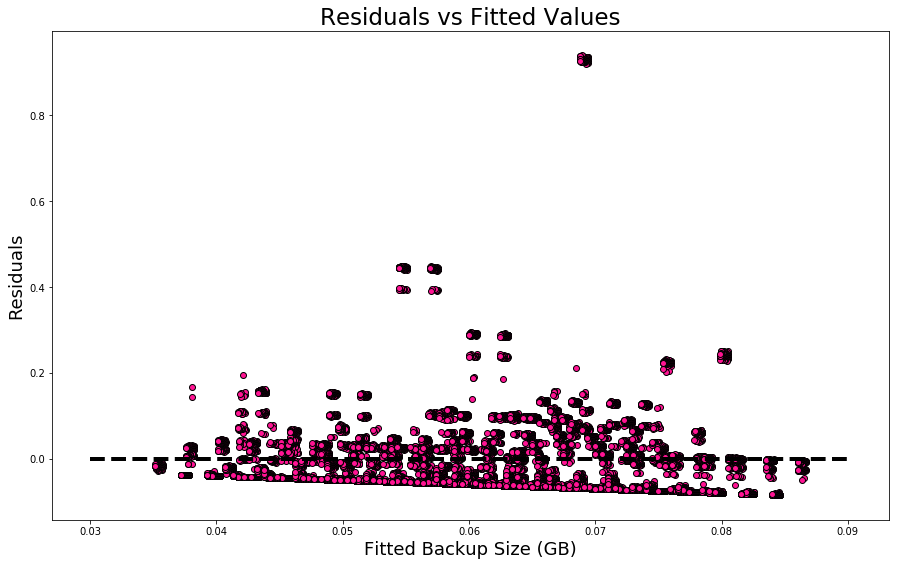

In [24]:

# RMSE
display(df)

lr.set_params(**best_param)
all_pre = lr.predict(input_arr)
residuals = np.subtract(output_arr, all_pre)

# plot fitted values vs true values
plt.figure(figsize=(15,9))
plt.scatter(output_arr, all_pre, color='deeppink', edgecolors='k')
plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], 'k--', lw=4)
plt.ylabel('Fitted Backup Size (GB)', fontsize = 18)
plt.xlabel('True Backup Size (GB)', fontsize = 18)
plt.title('Fitted Values vs True Values', fontsize = 23)
plt.show()

# plot residuals vs fitted values
plt.figure(figsize=(15,9))
plt.scatter(all_pre, residuals, color='deeppink', edgecolors='k')
plt.plot([0.03, 0.09], [0, 0], 'k--', lw=4)
plt.ylabel('Residuals', fontsize = 18)
plt.xlabel('Fitted Backup Size (GB)', fontsize = 18)
plt.title('Residuals vs Fitted Values', fontsize = 23)
plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


use f_regression:
(18588, 3)
[1 2 3]
use mutual_info_regression:
(18588, 3)
[2 3 4]
after f_regression:


,fold,train_rmse,test_rmse
0,0,0.990921,1.024132
1,1,0.997869,0.961420
2,2,0.990750,1.025524
3,3,0.997668,0.963290
4,4,0.990455,1.028083
5,5,0.997589,0.964064
6,6,0.990529,1.027430
7,7,0.997570,0.964248
8,8,0.990517,1.027589
9,9,0.998100,0.959228


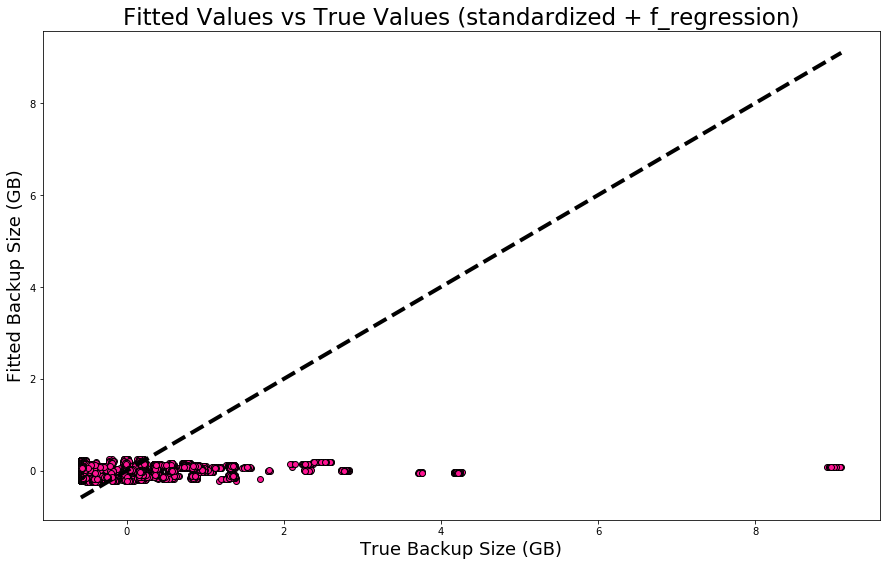

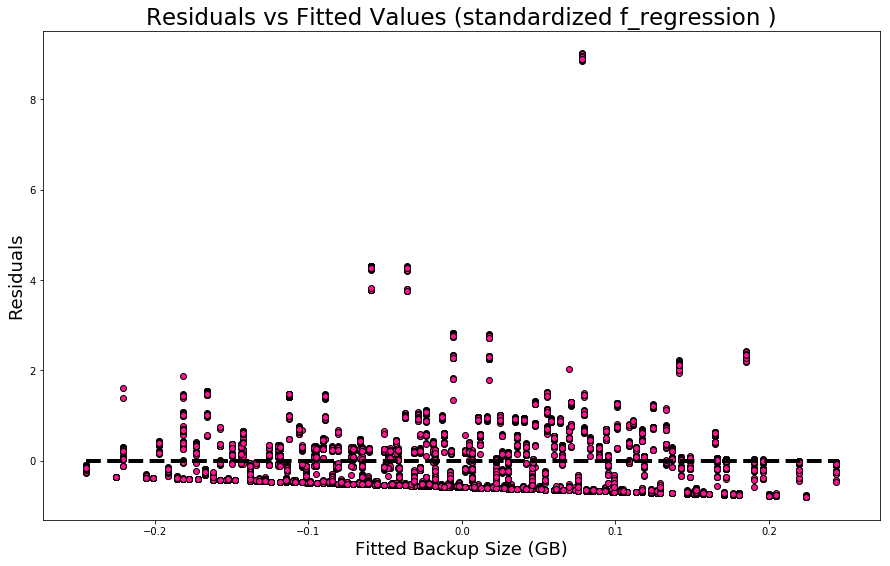

after mutual_info_regression:


,fold,train_rmse,test_rmse
0,0,0.991888,1.025784
1,1,0.999000,0.961580
2,2,0.991707,1.027262
3,3,0.998791,0.963534
4,4,0.991408,1.029864
5,5,0.998724,0.964186
6,6,0.991500,1.029055
7,7,0.998700,0.964421
8,8,0.991464,1.029416
9,9,0.999230,0.959415


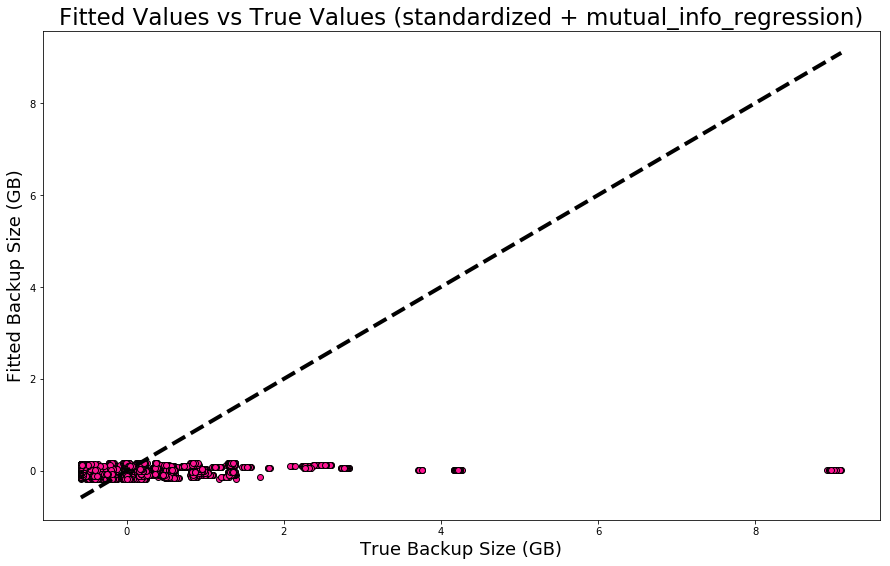

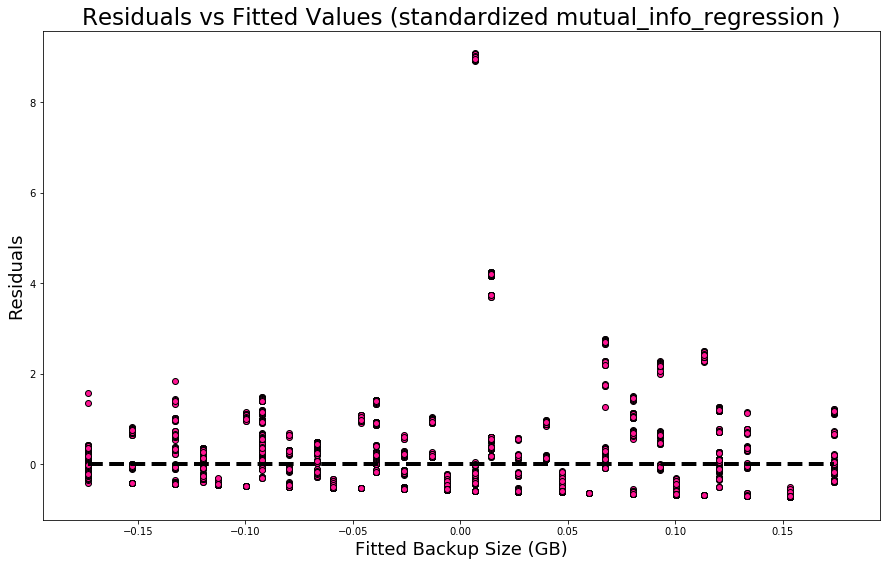

In [65]:
# extract input and output
input_arr = []
for row in range(len(data)):
    input_arr.append(data.loc[row, 'week':'file_name'].values)

output_arr = data.loc[:, 'size'].values

# standardize input, output
scaler = StandardScaler()
input_arr = scaler.fit_transform(input_arr)
output_arr = scaler.fit_transform(output_arr.reshape(-1, 1))

methods = ['f_regression', 'mutual_info_regression']
def select_features(method, method_str):
    select = SelectKBest(method, k=3).fit(input_arr, output_arr)
    input_arr_new = select.transform(input_arr)
    print ('use '+method_str+':')
    print (input_arr_new.shape)
    selected_features = select.get_support(True)
    print (selected_features)
    return input_arr_new
# 1 Use f_regression to select three most important variables
input_arr_new_f_regression = select_features(f_regression, methods[0])
# 2 Use mutual_info_regression to select three most important variables
input_arr_new_mutual_info_regression = select_features(mutual_info_regression, methods[1])

# train and fit new linear regression models
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def linear_regression_model(input_arr, method_str):
    lr = linear_model.LinearRegression()
    kf = KFold(n_splits=10, shuffle=False)
    best_param = None
    best_rmse = float("inf") 
    fold = [i for i in range(10)]
    train_rmses = []
    test_rmses = []

    for train_index, test_index in kf.split(input_arr):
        train_in = [input_arr[i] for i in train_index]
        train_out = [output_arr[i] for i in train_index]
        test_in = [input_arr[i] for i in test_index]
        test_out = [output_arr[i] for i in test_index]
    
        lr.fit(train_in, train_out)
    
        test_pre = lr.predict(test_in)
        train_pre = lr.predict(train_in)
    
        train_rmse = rmse(train_pre, train_out)
        test_rmse = rmse(test_pre, test_out)
    
        if ((train_rmse + test_rmse) < best_rmse):
            best_param = lr.get_params()

        train_rmses.append(train_rmse)
        test_rmses.append(test_rmse)

    df = pd.DataFrame({
        'fold' : fold,
        'train_rmse' : train_rmses,
        'test_rmse' : test_rmses
    }, columns = ['fold', 'train_rmse', 'test_rmse'])
    # RMSE
    print ('after '+method_str+':')
    display(df)

    lr.set_params(**best_param)
    all_pre = lr.predict(input_arr)
    residuals = np.subtract(output_arr, all_pre)

    # plot fitted values vs true values
    plt.figure(figsize=(15,9))
    plt.scatter(output_arr, all_pre, color='deeppink', edgecolors='k')
    plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], 'k--', lw=4)
    plt.ylabel('Fitted Backup Size (GB)', fontsize = 18)
    plt.xlabel('True Backup Size (GB)', fontsize = 18)
    plt.title('Fitted Values vs True Values (standardized + '+method_str+')', fontsize = 23)
    plt.show()

    # plot residuals vs fitted values
    plt.figure(figsize=(15,9))
    plt.scatter(all_pre, residuals, color='deeppink', edgecolors='k')
    plt.plot([all_pre.min(), all_pre.max()], [0, 0], 'k--', lw=4)
    plt.ylabel('Residuals', fontsize = 18)
    plt.xlabel('Fitted Backup Size (GB)', fontsize = 18)
    plt.title('Residuals vs Fitted Values (standardized '+method_str+' )', fontsize = 23)
    plt.show()
    
# 1 after using f_regression 
linear_regression_model(input_arr_new_f_regression, methods[0])
# 2 after using mutual_info_regression
linear_regression_model(input_arr_new_mutual_info_regression, methods[1])

#Feature Encoding

In [0]:
from sklearn.preprocessing import OneHotEncoder
# extract input and output
input_arr = []
for row in range(len(data)):
    input_arr.append(data.loc[row, 'week':'file_name'].values)
    
output_arr = data.loc[:, 'size'].values

# 2 use one-hot encoding method
def one_hot_encoding(input_arr, one_hot_pos):
    enc = OneHotEncoder(n_values='auto', categorical_features=one_hot_pos, 
                        sparse=False, handle_unknown='error')
    return enc.fit_transform(input_arr)

  

# calculate RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

lr = linear_model.LinearRegression()
kf = KFold(n_splits=10, shuffle=False)

train_rmses_means = []
test_rmses_means = []
combines = [i + 1 for i in range(32)]

for combine in range(32):
    # 00000~11111 (0~31) using bit operation
    one_hot_pos = []
    for pos in range(5):
        if ((combine >> pos) & 1) == 1:
            one_hot_pos.append(pos)
    tranformed_input = one_hot_encoding(np.array(input_arr), one_hot_pos)
    
    train_rmses = []
    test_rmses = []

    for train_index, test_index in kf.split(tranformed_input):
        train_in = [tranformed_input[i] for i in train_index]
        train_out = [output_arr[i] for i in train_index]
        test_in = [tranformed_input[i] for i in test_index]
        test_out = [output_arr[i] for i in test_index]

        lr.fit(train_in, train_out)

        test_pre = lr.predict(test_in)
        train_pre = lr.predict(train_in)

        train_rmse = rmse(train_pre, train_out)
        test_rmse = rmse(test_pre, test_out)

        train_rmses.append(train_rmse)
        test_rmses.append(test_rmse)

    train_rmses_means.append(np.mean(train_rmses))
    test_rmses_means.append(np.mean(test_rmses))

df = pd.DataFrame({
    'combine' : combines,
    'mean_train_rmse' : train_rmses_means,
    'mean_test_rmse' : test_rmses_means
}, columns = ['combine', 'mean_train_rmse', 'mean_test_rmse'])

display(df)
train_rmses = df['mean_train_rmse'].values
test_rmses = df['mean_test_rmse'].values

# find combination with best performance
best_combine = None
second_best_combine = None
third_best_combine = None
best_mean_rmses = float("inf") 
second_best_mean_rmses = float("inf")
third_best_mean_rmses = float("inf")
for i in range(len(train_rmses)):
    if (train_rmses[i]+test_rmses[i]<best_mean_rmses):
        third_best_mean_rmses = second_best_mean_rmses
        third_best_combine = second_best_combine
        second_best_mean_rmses = best_mean_rmses
        second_best_combine = best_combine
        best_mean_rmses = train_rmses[i] + test_rmses[i]
        best_combine = i
    elif (train_rmses[i]+test_rmses[i]<second_best_mean_rmses):
        third_best_mean_rmses = second_best_mean_rmses
        third_best_combine = second_best_combine
        second_best_mean_rmses = train_rmses[i] + test_rmses[i]
        second_best_combine = i
    elif (train_rmses[i]+test_rmses[i]<third_best_mean_rmses):
        third_best_mean_rmses = train_rmses[i] + test_rmses[i]
        third_best_combine = i

print ('The best combination is: '+str(best_combine))
print ('The best mean_train_rmse is: '+str(train_rmses[best_comine])+', and the best mean_test_rmse is: '+str(test_rmses[best_combine]))
print ('The second best combination is: '+str(second_best_combine))
print ('The second best mean_train_rmse is: '+str(train_rmses[second_best_combine])+', and the second best mean_test_rmse is: '+str(test_rmses[second_best_combine]))
print ('The third best combination is: '+str(third_best_combine))
print ('The third best mean_train_rmse is: '+str(train_rmses[third_best_combine])+', and the third best mean_test_rmse is: '+str(test_rmses[third_best_combine]))

# plot training RMSE and test RMSE
plt.figure(figsize=(15,9))
plt.plot(range(1,33), train_rmses, 'deeppink', label='mean train RMSE')
plt.plot(range(1,33), test_rmses, 'deepskyblue', label='mean test RMSE')
plt.ylabel('Encoding Combinations', fontsize = 18)
plt.xlabel('RMSE', fontsize = 18)
plt.title('Training & Test RMSE vs Encoding Combinations', fontsize = 23)
plt.legend(loc='upper left')
plt.show()

#control_illconditioning_and_overfitting

In [0]:
# extract input and output
input_arr = []
for row in range(len(data)):
    input_arr.append(data.loc[row, 'week':'file_name'].values)

output_arr = data.loc[:, 'size'].values

def one_hot_encoding(input_arr, one_hot_pos):
    enc = OneHotEncoder(n_values='auto', categorical_features=one_hot_pos, 
                        sparse=False, handle_unknown='error')
    return enc.fit_transform(input_arr)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def find_optimal_combination(input_arr, alg, kf_split=10, num_combines=32):
    # return values of this function
    best_test_rmse = float("inf")
    best_combination = 0
    
    kf = KFold(n_splits=kf_split, shuffle=False)
    for combine in range(num_combines):
        # 00000~11111 (0~31) using bit operation
        one_hot_pos = []
        for pos in range(5):
            if ((combine >> pos) & 1) == 1:
                one_hot_pos.append(pos)
        tranformed_input = one_hot_encoding(input_arr, one_hot_pos)

        test_rmses = []
        
        for train_index, test_index in kf.split(tranformed_input):
            
            train_in = [tranformed_input[i] for i in train_index]
            train_out = [output_arr[i] for i in train_index]
            test_in = [tranformed_input[i] for i in test_index]
            test_out = [output_arr[i] for i in test_index]

            alg.fit(train_in, train_out)
            test_pre = alg.predict(test_in)

            test_rmses.append(rmse(test_pre, test_out))

        mean_test_rmse = np.mean(test_rmses)
        
        if mean_test_rmse < best_test_rmse:
            best_test_rmse = mean_test_rmse
            best_combination = combine

    return best_combination, best_test_rmse

def combinaton_trans(combine):
    variables = ['week','day_of_week','start_time','work_flow','file_name']
    use_one_hot = []
    use_scalar = []
    for pos in range(5):
            if ((combine >> pos) & 1) == 1:
                use_one_hot.append(variables[pos])
            else:
                use_scalar.append(variables[pos])
    return 'use_one_hot: ' + str(use_one_hot) + '\nuse_scalar: ' + str(use_scalar)

# Ridge Regularizer & Lasso Regularizer
def Ridge_Lasso_Regularizer(name):
    print('using ' + name)
    best_combine = None
    lowest_rmse = float("inf")
    optimal_alpha = 1
    for alpha in [0.001, 0.01, .1, .5, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
        reg = None
        if name == 'Ridge Regularizer':
            reg = linear_model.Ridge (alpha = alpha)
        else:
            reg = linear_model.Lasso(alpha=alpha)
        best_combination, best_test_rmse = find_optimal_combination(input_arr, reg, kf_split=10, num_combines=32)
        if best_test_rmse < lowest_rmse:
            best_combine = best_combination
            lowest_rmse = best_test_rmse
            optimal_alpha = alpha

    print ('Optimal Combination:')
    print (combinaton_trans(best_combine)) 
    print ('Optimal Alpha: ' + str(optimal_alpha))
    print ('Optimal Test Rmse: ' + str(lowest_rmse))

    one_hot_pos = []
    for pos in range(5):
        if ((best_combine >> pos) & 1) == 1:
            one_hot_pos.append(pos)
    tranformed_input = one_hot_encoding(input_arr, one_hot_pos)

    alg = linear_model.Ridge (alpha = optimal_alpha)
    alg.fit(tranformed_input, output_arr)
    print ('estimated coefficients: ')
    print (str(alg.coef_))
    print ('-----------------------------------------')

Ridge_Lasso_Regularizer('Ridge Regularizer')
Ridge_Lasso_Regularizer('Lasso Regularizer')

# Elastic Net Regularizer:
print('using ' + 'Elastic Net Regularizer')
best_combine = None
lowest_rmse = float("inf")
optimal_alpha = .2
optimal_l1_ratio = 0.001
for alpha in [0.01, 0.1, 1, 10, 100]:
    for l1_ratio in [0.1, 0.5, 0.9]:
        reg = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        best_combination, best_test_rmse = find_optimal_combination(input_arr, reg, kf_split=10, num_combines=32)
        if best_test_rmse < lowest_rmse:
            best_combine = best_combination
            lowest_rmse = best_test_rmse
            optimal_alpha = alpha

print ('Optimal Combination:')
print (combinaton_trans(best_combine)) 
print ('Optimal Alpha1: ' + str(optimal_alpha * optimal_l1_ratio))
print ('Optimal Alpha2: ' + str(optimal_alpha * (1-optimal_l1_ratio)))
print ('Optimal Test Rmse: ' + str(lowest_rmse))

one_hot_pos = []
for pos in range(5):
    if ((best_combine >> pos) & 1) == 1:
        one_hot_pos.append(pos)
tranformed_input = one_hot_encoding(input_arr, one_hot_pos)

alg = ElasticNet(alpha=optimal_alpha, l1_ratio=optimal_l1_ratio)
alg.fit(tranformed_input, output_arr)
print ('estimated coefficients: ')
print (str(alg.coef_))
print ('-----------------------------------------')

# using un-regularized best model
print('using un-regularized best model')

best_combine = 22
one_hot_pos = []
for pos in range(5):
    if ((best_combine >> pos) & 1) == 1:
        one_hot_pos.append(pos)
tranformed_input = one_hot_encoding(input_arr, one_hot_pos)

lr = linear_model.LinearRegression()
lr.fit(tranformed_input, output_arr)

print ('Optimal Combination:')
print (combinaton_trans(best_combine))
print ('Optimal Test Rmse: 0.0883701294703')
print ('estimated coefficients: ')
print (str(lr.coef_))
print ('-----------------------------------------')


#neural_network_regression

In [0]:
# extract input and output
input_arr = []
for row in range(len(data)):
    input_arr.append(data.loc[row, 'week':'file_name'].values)

output_arr = data.loc[:, 'size'].values

def one_hot_encoding(input_arr, one_hot_pos):
    enc = OneHotEncoder(n_values='auto', categorical_features=one_hot_pos, 
                        sparse=False, handle_unknown='error')
    return enc.fit_transform(input_arr)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def get_x_y(activation):
    x_y = {}
    for hidden_units in range(10, 200, 20):
        reg = MLPRegressor(hidden_layer_sizes=(hidden_units, ), activation=activation)
        kf = KFold(n_splits=10, shuffle=False)
        
        test_rmses = []
        for train_index, test_index in kf.split(tranformed_input):
            train_in = [tranformed_input[i] for i in train_index]
            train_out = [output_arr[i] for i in train_index]
            test_in = [tranformed_input[i] for i in test_index]
            test_out = [output_arr[i] for i in test_index]
            reg.fit(train_in, train_out)
            test_pre = reg.predict(test_in)
            test_rmses.append(rmse(test_pre, test_out))
        
        x_y[hidden_units] = np.mean(test_rmses)
    return x_y

combine = 31
one_hot_pos = []
for pos in range(5):
    if ((combine >> pos) & 1) == 1:
        one_hot_pos.append(pos)
tranformed_input = one_hot_encoding(input_arr, one_hot_pos)

activation_x_y = {}
for activation in ['relu','logistic', 'tanh']:
    activation_x_y[activation] = get_x_y(activation)

# plot test RMSE vs number of hidden units
plt.figure(figsize=(15,9))
plt.plot(range(10, 200, 20), list(activation_x_y['relu'].values()), 'darkorange', label='activity function: relu')
plt.plot(range(10, 200, 20), list(activation_x_y['logistic'].values()), 'deepskyblue', label='activity function: logistic')
plt.plot(range(10, 200, 20), list(activation_x_y['tanh'].values()), 'deeppink', label='activity function: tanh')
plt.xlabel('Number of Hidden Units', fontsize=18)
plt.ylabel('Test RMSE', fontsize=18)
plt.title('Test RMSE vs Number of Hidden Units', fontsize=23)
plt.axis([0, 200, 0.02, 0.12])
plt.legend(loc='upper right')
plt.show()

# find optimal combination
min_y = float("inf")
optimal_com = None
for key in activation_x_y:
    x_y = activation_x_y[key]
    for x in x_y:
        if x_y[x] < min_y:
            min_y = x_y[x]
            optimal_com = (key, x)
print ('The best combination is:')
print (optimal_com)

reg = MLPRegressor(hidden_layer_sizes=(130, ), activation='relu')
reg.fit(tranformed_input, output_arr)
all_pre = reg.predict(tranformed_input)
residuals = np.subtract(output_arr, all_pre)
final_rmse = rmse(all_pre, output_arr)

# plot fitted values vs true values
plt.figure(figsize=(15,9))
plt.scatter(output_arr, all_pre, color='deeppink', edgecolors='k')
plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], 'k--', lw=4)
plt.ylabel('Fitted Backup Size (GB)', fontsize = 18)
plt.xlabel('True Backup Size (GB)', fontsize = 18)
plt.title('Fitted Values vs True Values (Neural Network Regression)', fontsize = 23)
plt.show()

# plot residuals vs fitted values
plt.figure(figsize=(15,9))
plt.scatter(all_pre, residuals, color='deeppink', edgecolors='k')
plt.plot([all_pre.min(), all_pre.max()], [0, 0], 'k--', lw=4)
plt.ylabel('Residuals', fontsize = 18)
plt.xlabel('Fitted Backup Size (GB)', fontsize = 18)
plt.title('Residuals vs Fitted Values (Neural Network Regression)', fontsize = 23)
plt.show()

#linear_regression_model

In [0]:
# extract input and output
map_workflow_input = {}
map_workflow_output = {}

for workflow in range(5):
    df = data[data['work_flow'] == workflow]
    df = df.drop('work_flow', 1, inplace = False)
    input_arr = []
    output_arr = []
    for row in range(len(df)):
        input_arr.append(df.iloc[row, 0:4].values)
    output_arr = df.loc[:, 'size'].values
    map_workflow_input[workflow] = input_arr
    map_workflow_output[workflow] = output_arr

def one_hot_encoding(input_arr, one_hot_pos):
    enc = OneHotEncoder(n_values='auto', categorical_features=one_hot_pos, 
                        sparse=False, handle_unknown='error')
    return enc.fit_transform(input_arr)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Using linear regression model
for workflow in range(5):
    print ('workflow' + str(workflow))
    print ('-----------------------------------------')
    cur_input = map_workflow_input[workflow]
    cur_output = map_workflow_output[workflow]
    # one-hot-encoding
    best_combine = 14
    one_hot_pos = []
    for pos in range(5):
        if ((best_combine >> pos) & 1) == 1:
            one_hot_pos.append(pos)
    tranformed_cur_input = one_hot_encoding(cur_input, one_hot_pos)
    # Ridge regularizer
    reg = linear_model.Ridge (alpha = 5)
    # use 10-fold cross-validation to evaluate
    kf = KFold(n_splits=10, shuffle=False)
    best_param = None
    lowest_rmse = float('inf')
    
    for train_index, test_index in kf.split(tranformed_cur_input):
        train_in = [tranformed_cur_input[i] for i in train_index]
        train_out = [output_arr[i] for i in train_index]
        test_in = [tranformed_cur_input[i] for i in test_index]
        test_out = [output_arr[i] for i in test_index]

        reg.fit(train_in, train_out)
        test_pre = reg.predict(test_in)
        cur_rmse = rmse(test_pre, test_out)
        if (cur_rmse < lowest_rmse):
            lowest_rmse = cur_rmse
            best_param = reg.get_params()
    
    reg.set_params(**best_param)
    reg.fit(tranformed_cur_input, cur_output)
    all_pre = reg.predict(tranformed_cur_input)
    residuals = np.subtract(cur_output, all_pre)
    final_rmse = rmse(all_pre, cur_output)
    print ('RMSE of Work Flow '+str(workflow)+': '+str(final_rmse))
    
    # plot fitted values vs true values
    plt.figure(figsize=(15,9))
    plt.scatter(cur_output, all_pre, color='deeppink', edgecolors='k')
    plt.plot([cur_output.min(), cur_output.max()], [cur_output.min(), cur_output.max()], 'k--', lw=4)
    plt.ylabel('Fitted Backup Size (GB)', fontsize = 18)
    plt.xlabel('True Backup Size (GB)', fontsize = 18)
    plt.title('Fitted Values vs True Values (Work Flow '+str(workflow)+')', fontsize = 23)
    plt.show()

    # plot residuals vs fitted values
    plt.figure(figsize=(15,9))
    plt.scatter(all_pre, residuals, color='deeppink', edgecolors='k')
    plt.plot([all_pre.min(), all_pre.max()], [0, 0], 'k--', lw=4)
    plt.ylabel('Residuals', fontsize = 18)
    plt.xlabel('Fitted Backup Size (GB)', fontsize = 18)
    plt.title('Residuals vs Fitted Values (Work Flow '+str(workflow)+')', fontsize = 23)
    plt.show()
    
    print ('-----------------------------------------')
